# Analysis and prediction of collisions for space debris

In [1]:
READ = True
WRITE = False
REQUEST = False

In [2]:
import pandas as pd
import numpy as np
import pickle

ModuleNotFoundError: No module named 'pandas'

In [207]:
def TleRespose2df(tle_response):
    import tletools
    out = tle_response.text.strip()
    tl = tletools.TLE.loads(out)

    df = pd.DataFrame()
    for i in tl:
        new_df = pd.DataFrame([i.asdict()])
        df = pd.concat([df, new_df], ignore_index=True)

    return df

In [208]:
if REQUEST:
    import yaml

    with open("config.yaml", 'r') as ymlfile:
        pw = yaml.load(ymlfile, Loader=yaml.FullLoader)
    import requests

    # Space-Track credentials (replace with your actual credentials)
    USERNAME = pw['username']
    PASSWORD = pw['password']

    # Space-Track API URL for the TLE query
    TLE_URL = "https://www.space-track.org/basicspacedata/query/class/gp/EPOCH/%3Enow-30/MEAN_MOTION/%3E11.25/format/3le"

    # Login payload
    LOGIN_URL = "https://www.space-track.org/ajaxauth/login"

    # Start session
    session = requests.Session()

    # Authenticate
    login_payload = {
        "identity": USERNAME,
        "password": PASSWORD
    }
    response = session.post(LOGIN_URL, data=login_payload)

    if response.status_code == 200:
        print("Login successful.")

        # Download TLE file
        tle_response = session.get(TLE_URL)

        if tle_response.status_code == 200:
            df = TleRespose2df(tle_response)
            print("TLE data loaded")
        else:
            print(f"Failed to retrieve TLE data. Status code: {tle_response.status_code}")
    else:
        print(f"Login failed. Status code: {response.status_code}")


In [209]:
if WRITE:
    df.to_parquet("tledata.parquet")

In [210]:
if READ:
    df = pd.read_parquet("tledata2.parquet")

In [211]:
df

,name,norad,classification,int_desig,epoch_year,epoch_day,dn_o2,ddn_o6,bstar,set_num,inc,raan,ecc,argp,M,n,rev_num
0,0 TBA - TO BE ASSIGNED,T0446,U,,2025,33.190933,0.004608,0.0,0.014196,999,87.9754,303.7790,0.011306,98.9946,262.4118,15.259502,2415
1,0 TBA - TO BE ASSIGNED,T0438,U,,2025,30.544094,0.000050,0.0,0.002187,999,88.9391,330.0560,0.021988,314.3978,43.9384,14.117553,2256
2,0 TBA - TO BE ASSIGNED,T0429,U,,2025,33.725444,0.000116,0.0,0.004432,999,87.8578,305.5410,0.001472,33.2468,326.9648,14.305688,2386
3,0 TBA - TO BE ASSIGNED,T0425,U,,2025,32.068848,0.000126,0.0,0.002304,999,88.4925,318.2671,0.015036,109.3302,252.4238,14.588305,2407
4,0 TBA - TO BE ASSIGNED,T0413,U,,2025,33.779203,0.000075,0.0,0.001115,999,88.7594,323.5947,0.015448,134.7535,226.6375,14.670425,2594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22841,0 TIROS 1,29,U,60002B,2025,34.569876,0.000016,0.0,0.000256,999,48.3772,232.3636,0.002296,280.9110,78.9220,14.775725,46847
22842,0 EXPLORER 7,00022,U,59009A,2025,33.914133,0.000218,0.0,0.001023,999,50.2778,23.4166,0.009804,293.2042,65.8612,15.153099,72429
22843,0 VANGUARD 3,20,U,59007A,2025,33.994679,0.000016,0.0,0.000625,999,33.3536,262.0714,0.164548,260.5305,80.6313,11.603970,42660
22844,0 VANGUARD R/B,00012,U,59001B,2025,33.763014,0.000008,0.0,0.000476,999,32.9000,184.0328,0.165108,342.2117,12.6716,11.475706,47391


In [212]:
col = pd.read_csv("TIP_data.csv")
col

,NORAD_CAT_ID,MSG_EPOCH,INSERT_EPOCH,DECAY_EPOCH,WINDOW,REV,DIRECTION,LAT,LON,INCL,NEXT_REPORT,ID,HIGH_INTEREST,OBJECT_NUMBER
0,60,2012-03-24 15:19:00,2012-03-24 09:23:00,2012-03-28 03:04:00,2880,58623,ascending,-42.7,13.3,49.9,72,3007,N,60
1,60,2012-03-25 03:50:00,2012-03-24 21:55:48,2012-03-28 04:18:00,2880,58624,descending,-41.2,272.6,49.9,48,3010,N,60
2,60,2012-03-26 04:36:00,2012-03-25 22:40:37,2012-03-28 03:39:00,1440,58624,ascending,48.3,125.8,49.9,24,3013,N,60
3,60,2012-03-27 03:47:00,2012-03-26 21:50:52,2012-03-28 02:47:00,840,58624,descending,-33.4,282.0,49.9,12,3020,N,60
4,60,2012-03-27 14:54:00,2012-03-27 09:00:14,2012-03-28 02:23:00,420,58623,descending,38.7,212.3,49.9,6,3023,N,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17812,62608,2025-01-28 19:31:00,2025-01-28 19:36:21,2025-01-29 19:37:00,300,249,ascending,-49.9,126.8,51.6,12,45707,N,62608
17813,62608,2025-01-29 06:13:00,2025-01-29 06:26:37,2025-01-29 18:31:00,180,250,ascending,8.0,219.7,51.6,6,45724,N,62608
17814,62608,2025-01-29 12:25:00,2025-01-29 12:36:20,2025-01-29 18:32:00,180,250,ascending,12.8,223.3,51.6,2,45731,N,62608
17815,62608,2025-01-29 15:54:00,2025-01-29 16:26:26,2025-01-29 17:52:00,27,250,descending,-22.8,62.7,51.6,0,45735,N,62608


In [213]:
df = df.loc[pd.to_numeric(df['norad'], errors='coerce').notna()].copy()
df['norad'] = df['norad'].astype(int)

df.loc[:, "collision"] = df["norad"].isin(col["OBJECT_NUMBER"])
df.loc[:, "a"] = (398600 / ((df["n"] * (2 * np.pi) / 86400) ** 2)) ** (1/3)

# oe = ['dn_o2', 'ddn_o6', 'bstar', 'inc', 'raan','ecc', 'argp', 'M', 'n', 'a']
oe = ['dn_o2', 'ddn_o6', 'bstar', 'inc', 'raan','ecc', 'argp', 'M', 'n']

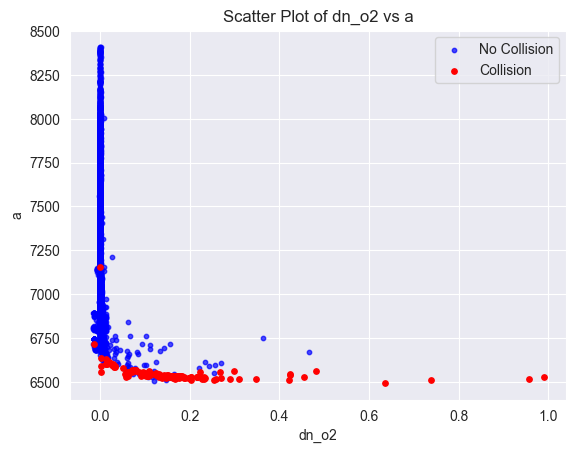

In [214]:
import matplotlib.pyplot as plt

# Define colors: red for collision, blue otherwise
colors = df["collision"].map({True: "red", False: "blue"})

x = "dn_o2"
y = "a"

# Plot non-collision points first (blue), then collision points (red)
plt.scatter(df[x][~df["collision"]], df[y][~df["collision"]], c="blue", s=10, alpha=0.7, label="No Collision")
plt.scatter(df[x][df["collision"]], df[y][df["collision"]], c="red", s=15, alpha=1.0, label="Collision")

plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Scatter Plot of {x} vs {y}")
plt.legend()
plt.grid(True)
plt.show()

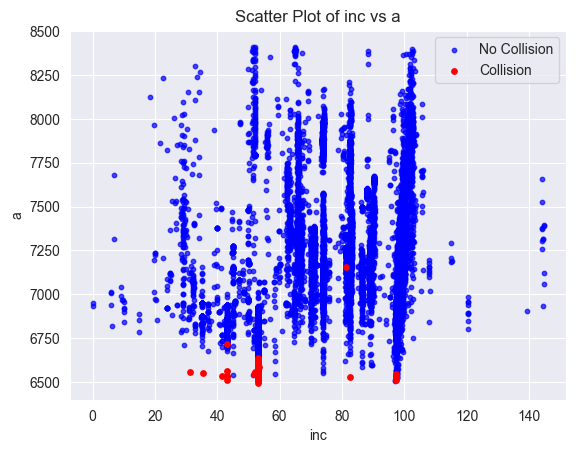

In [215]:
import matplotlib.pyplot as plt

# Define colors: red for collision, blue otherwise
colors = df["collision"].map({True: "red", False: "blue"})

x = "inc"
y = "a"

# Plot non-collision points first (blue), then collision points (red)
plt.scatter(df[x][~df["collision"]], df[y][~df["collision"]], c="blue", s=10, alpha=0.7, label="No Collision")
plt.scatter(df[x][df["collision"]], df[y][df["collision"]], c="red", s=15, alpha=1.0, label="Collision")

plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Scatter Plot of {x} vs {y}")
plt.legend()
plt.grid(True)
plt.show()


In [216]:
oe

['dn_o2', 'ddn_o6', 'bstar', 'inc', 'raan', 'ecc', 'argp', 'M', 'n']

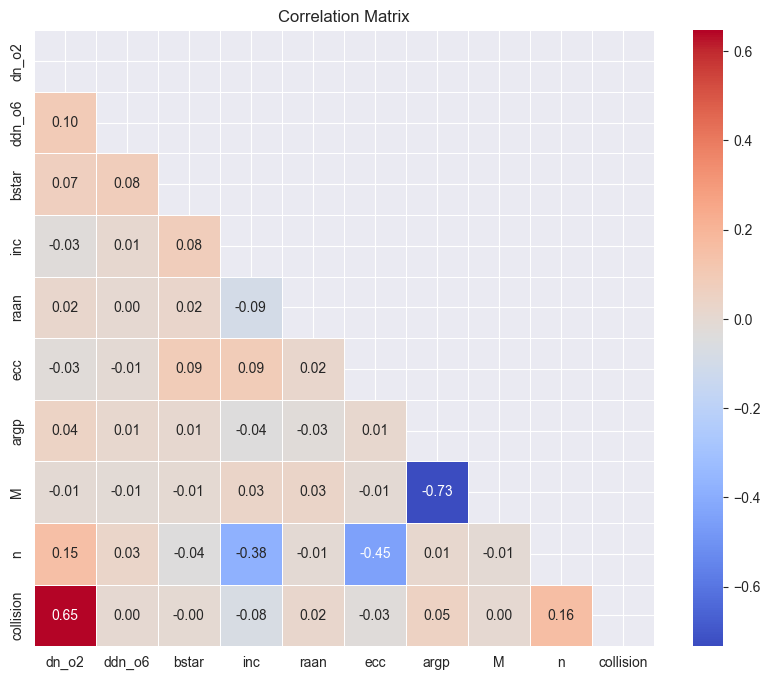

In [217]:
import seaborn as sns
oec = oe + ["collision"]
corr_matrix = df[oec].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df[oe]   # Feature columns
y = df['collision']      # Target column (True if collision, False otherwise)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the target on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8973
        True       0.85      0.94      0.89        49

    accuracy                           1.00      9022
   macro avg       0.93      0.97      0.95      9022
weighted avg       1.00      1.00      1.00      9022

Accuracy: 0.9987807581467524


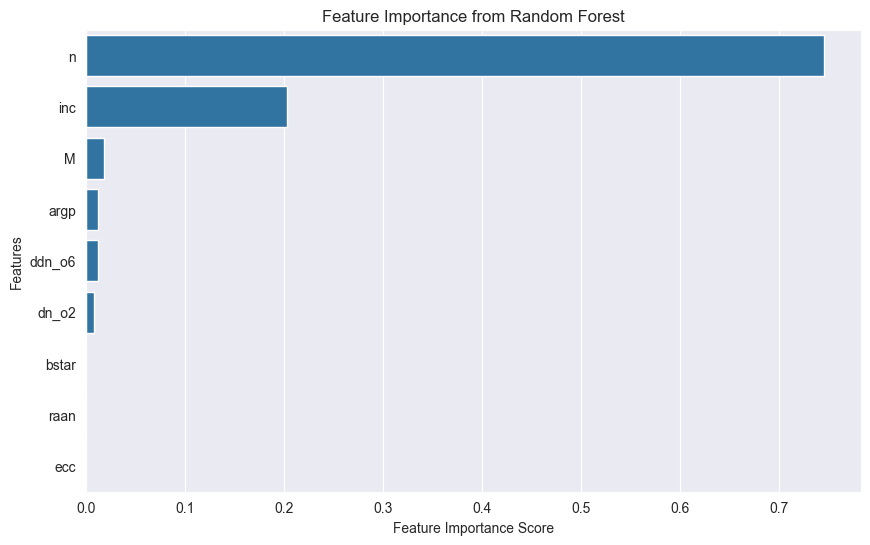

In [219]:
# Get feature importances
feature_importance = clf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()

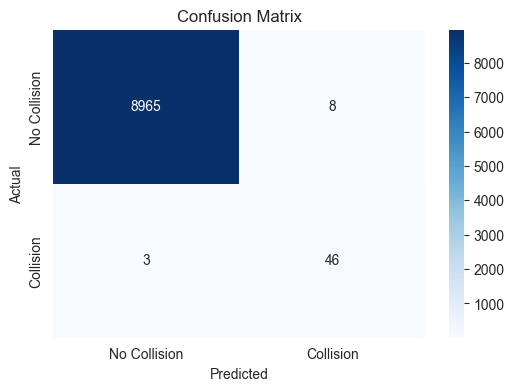

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix from test data and predictions
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Collision', 'Collision'],
            yticklabels=['No Collision', 'Collision'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


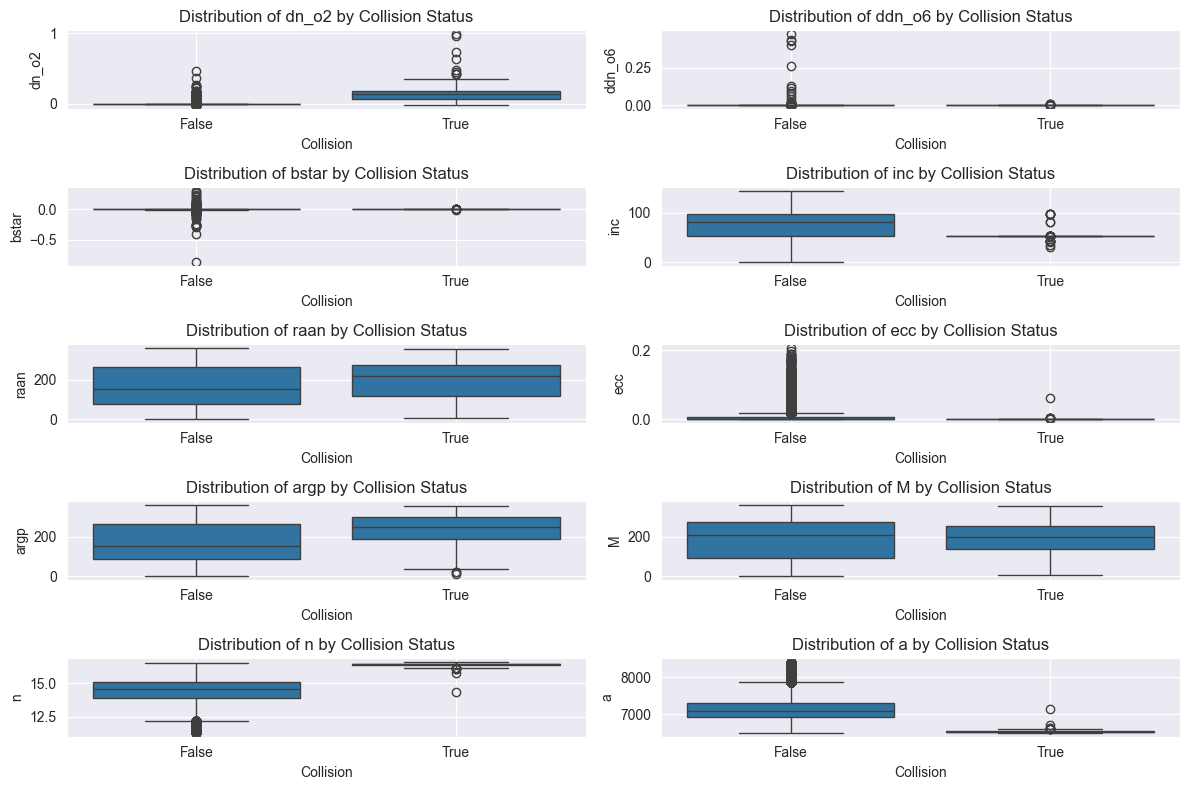

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for subplots
n_rows = 5
n_cols = 2

oef = oe + ["a"]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten in case of a single row

# Loop through each orbital element and create a boxplot
for i, element in enumerate(oef):
    sns.boxplot(x=df["collision"], y=df[element], ax=axes[i])
    axes[i].set_xlabel("Collision")
    axes[i].set_ylabel(element)
    axes[i].set_title(f"Distribution of {element} by Collision Status")
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

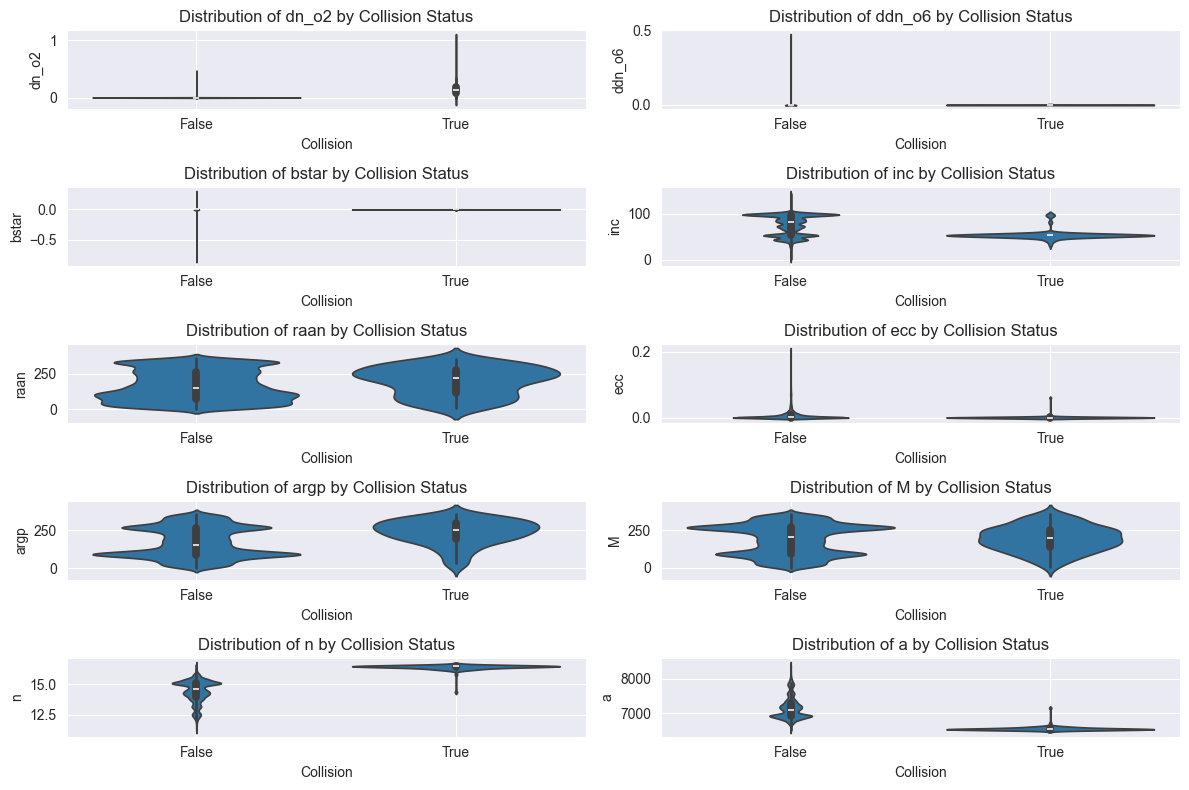

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for subplots
n_rows = 5  # Arrange in 3 columns
n_cols = 2  # Max 3 columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten in case of a single row

# Loop through each orbital element and create a violin plot
for i, element in enumerate(oef):
    sns.violinplot(x=df["collision"], y=df[element], ax=axes[i], inner="box")
    axes[i].set_xlabel("Collision")
    axes[i].set_ylabel(element)
    axes[i].set_title(f"Distribution of {element} by Collision Status")
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()